In [24]:
from expander import *
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
from random import uniform
from mpl_toolkits.mplot3d import Axes3D


plt.rcParams["figure.figsize"] = (10, 10)

In [25]:
with open('polygons_20220816T161348.csv') as f:
    content = f.readlines()

In [26]:
polygons=[[] for _ in range(1000)]
# polygons
i=0
for line in content:
    if line=='\n':
        i+=1
    else:
        point = np.array(line.strip().split(',')).astype(float)
        polygons[i].append(point)
# polygons

In [27]:
CAC_list=[]

# objective function
# intentionally skip pairs of points on 2 adjacent edges which cause 0 gradient
def fun(x):
    coords=polygons[ind]
    a=x[0]
    b=x[1]
    if a>=b:
        return float('inf')
#     if points_on_adjacent_edge(agg_lengths, a, b):
#         return float('inf')
    try: 
        return max(-max_l+b-a, -b+a)/(np.linalg.norm(gamma(coords, b, agg_lengths) - gamma(coords, a, agg_lengths)))
    except:
        return float('inf')

for ind in range(1000):
    lengths, max_l = max_chord_length(polygons[ind], return_list=True)
    agg_lengths = compute_agg_lengths(lengths)
    # x0=[uniform(0, max_l), uniform(0, max_l)]
    bnd = [(0,max_l),(0,max_l)]
    start = time.time()

    # res = scipy.optimize.basinhopping(fun, x0, niter=100, T=1.0, stepsize=0.5)
    # res = scipy.optimize.differential_evolution(fun, bounds=bnd, tol=1e-11)

#     res = scipy.optimize.dual_annealing(fun, bounds=bnd, maxiter=500, initial_temp=2e4, visit=2.8)

    rranges = (slice(0, max_l, max_l/200), slice(0, max_l, max_l/200))
    res = scipy.optimize.brute(fun, rranges, full_output=True,
                              finish=scipy.optimize.fmin)

    end = time.time()
#     print(f'{end - start:.2f} s')
    # res[0],res[1]
#     print(res[1])
    CAC_list.append(res[1])

ZeroDivisionError: float division by zero

In [29]:
len(CAC_list)

20

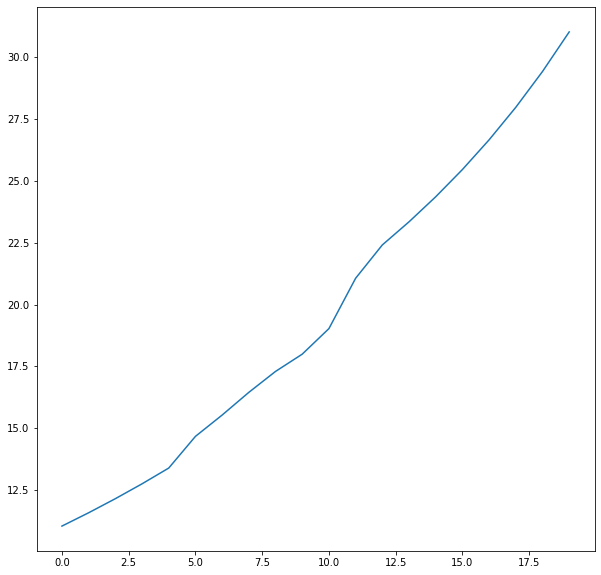

In [28]:
CAC_list=[-i for i in CAC_list]
plt.plot(CAC_list)

In [30]:
with open('speeds_20220816T161348.csv') as f:
    speeds = f.readlines()
speeds = [float(s.strip().split(',')[1]) for s in speeds]

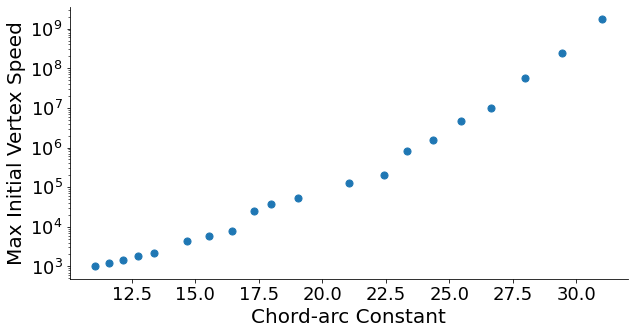

In [40]:
plt.rcParams["figure.figsize"] = (10, 5)
fig, ax = plt.subplots()

ax.set_yscale('log')

ax.scatter(CAC_list, speeds, s=50,alpha=1)

_=plt.xlabel('Chord-arc Constant', fontsize=20)
_=plt.ylabel('Max Initial Vertex Speed', fontsize=20)
_=plt.xticks(fontsize=18)
_=plt.yticks(fontsize=18)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.savefig('scatter.png', dpi=300)